In [1]:
import numpy as np # generic math functions
import matplotlib.pyplot as plt
import time
import scipy

-2.0000000000000004 -2.0
-3.2360679774997894 -2.618033988749903
-4.000000000000009 -3.0
-4.4939592074349575 -4.048917339522324
-4.828427124746193 -4.828427124746194
-5.758770483143661 -5.411474127809806
-6.472135954999602 -5.8541019662497265
-7.026674183332309 -6.74204450678574
-7.4641016151377855 -7.464101615137778
-8.296229810558842 -8.055156450048234
-8.987918414869934 -8.54287654695734


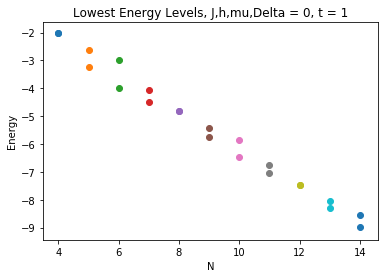

In [2]:
N_min, N_max = (4, 15)

for i, N in enumerate(range(N_min, N_max)):
    E_0, E_1 = np.load(r'/media/maciejko/zhan/top/data/E_fermion_'+str(N)+'.npy')
    plt.scatter((N,N),(E_0,E_1))
    plt.xlabel('N')
    plt.ylabel('Energy')
    plt.title('Lowest Energy Levels, J,h,mu,Delta = 0, t = 1')
    print(E_0, E_1)
    plt.savefig('/media/maciejko/zhan/top/plots/fermion_lowestenergy.png')
    plt.savefig('/media/maciejko/zhan/top/plots/fermion_lowestenergy.pdf')

-2.0000000000000004 -2.0
-3.2360679774997894 -2.618033988749903
-4.000000000000009 -3.0
-4.4939592074349575 -4.048917339522324
-4.828427124746193 -4.828427124746194
-5.758770483143661 -5.411474127809806
-6.472135954999602 -5.8541019662497265
-7.026674183332309 -6.74204450678574
-7.4641016151377855 -7.464101615137778
-8.296229810558842 -8.055156450048234
-8.987918414869934 -8.54287654695734


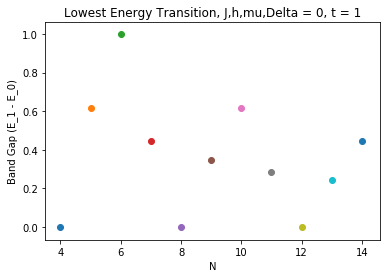

In [3]:
for i, N in enumerate(range(N_min, N_max)):
    E_0, E_1 = np.load(r'/media/maciejko/zhan/top/data/E_fermion_'+str(N)+'.npy')
    plt.scatter((N),(E_1-E_0))
    plt.xlabel('N')
    plt.ylabel('Band Gap (E_1 - E_0)')
    plt.title('Lowest Energy Transition, J,h,mu,Delta = 0, t = 1') 
    print(E_0, E_1)
    plt.savefig('/media/maciejko/zhan/top/plots/fermion_bandgap.png')
    plt.savefig('/media/maciejko/zhan/top/plots/fermion_bandgap.pdf')

In [28]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [29]:
def func(x, a, b, c, d):
    return a*np.cos(b*x+c)+d

In [30]:
xdata = np.zeros(N_max-N_min)
ydata = np.zeros(N_max-N_min)

for i, N in enumerate(range(N_min, N_max)):
    E_0, E_1 = np.load(r'/media/maciejko/zhan/top/data/E_fermion_'+str(N)+'.npy')
    xdata[i] = N
    ydata[i] = (E_1 - E_0)*N

In [31]:
popt, pcov = curve_fit(func, xdata, ydata)

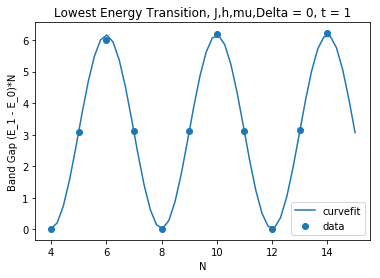

In [36]:
    plt.scatter(xdata,ydata,label='data')
    plt.plot(np.linspace(N_min,N_max),func(np.linspace(N_min,N_max),*popt),label='curvefit')
    plt.xlabel('N')
    plt.ylabel('Band Gap (E_1 - E_0)*N')
    plt.title('Lowest Energy Transition, J,h,mu,Delta = 0, t = 1')
    plt.legend()
    plt.savefig('/media/maciejko/zhan/top/plots/fermion_bandgap_withN.png')
    plt.savefig('/media/maciejko/zhan/top/plots/fermion_bandgap_withN.pdf')